# Data Understanding

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
cols = df.columns
df.columns = [col.lower() for col in cols]
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.rename(columns={'sepallengthcm' : 'sepal_length', 
                   'sepalwidthcm'  : 'sepal_width' ,
                   'petallengthcm' : 'petal_length',
                   'petalwidthcm'  : 'petal_width'},
                   inplace=True)

df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.drop("id", axis=1, inplace=True) 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df["species"].nunique()

3

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


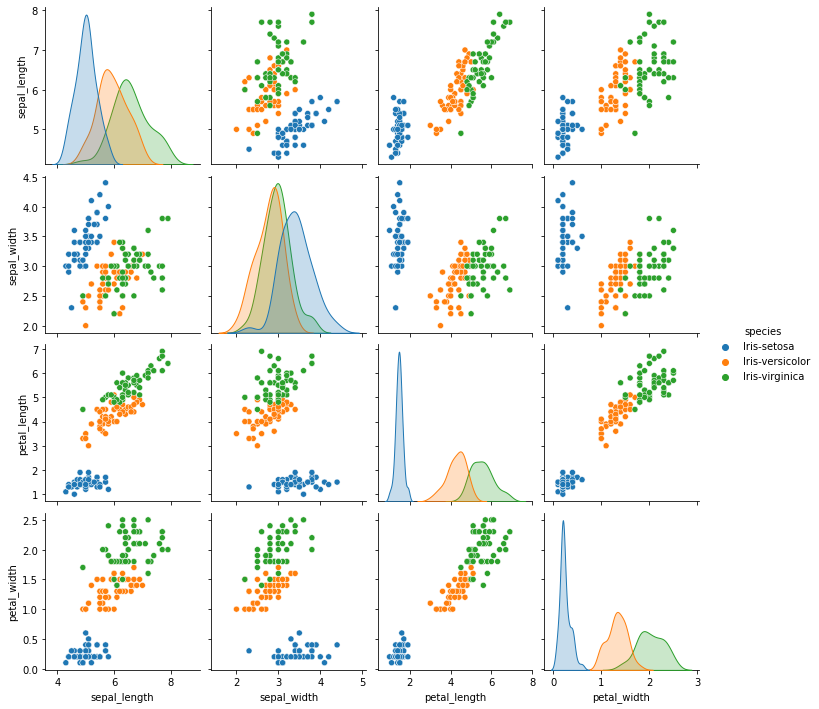

In [10]:
p=sns.pairplot(df, hue = 'species')

In [12]:
df.species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


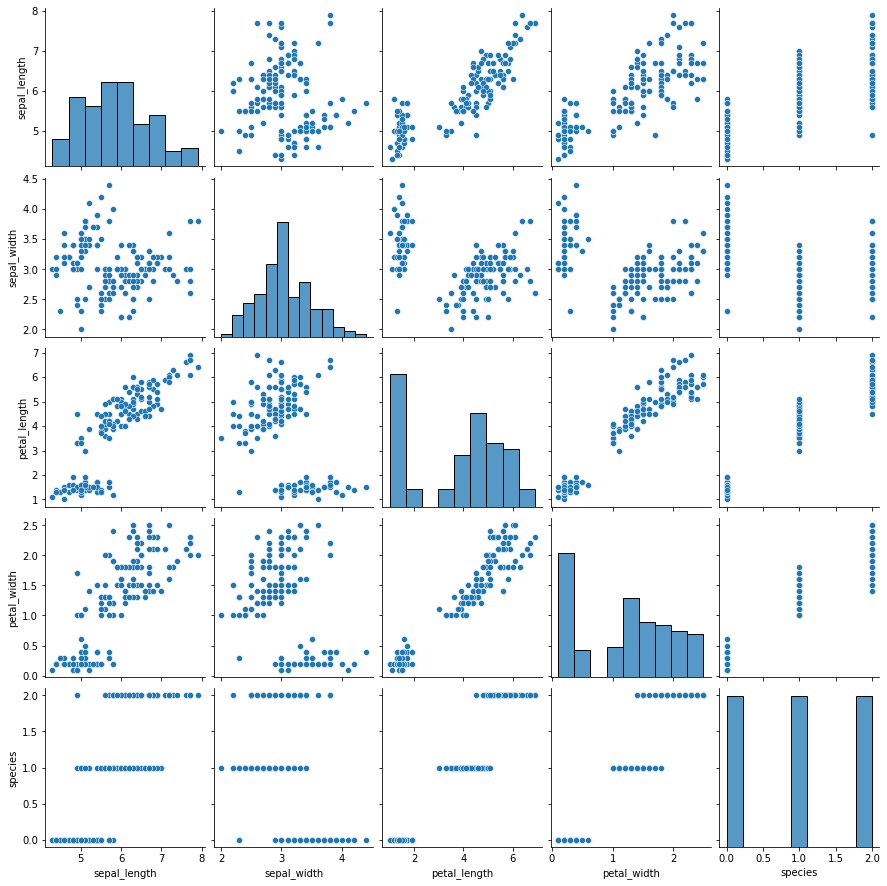

In [14]:
sns.pairplot(df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

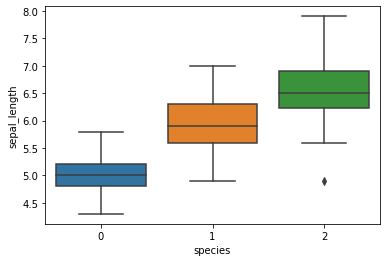

In [15]:
sns.boxplot('species','sepal_length',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='sepal_width'>

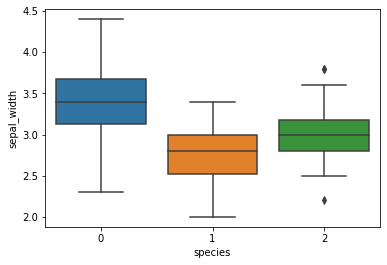

In [16]:
sns.boxplot('species','sepal_width',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='petal_length'>

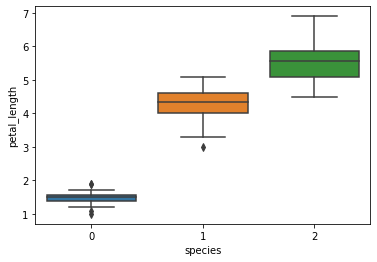

In [17]:
sns.boxplot('species','petal_length',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='petal_width'>

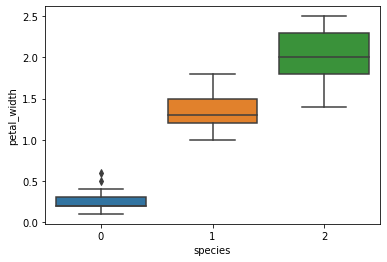

In [18]:
sns.boxplot('species','petal_width',data=df)

In [19]:
df.set_index('species',inplace=True)

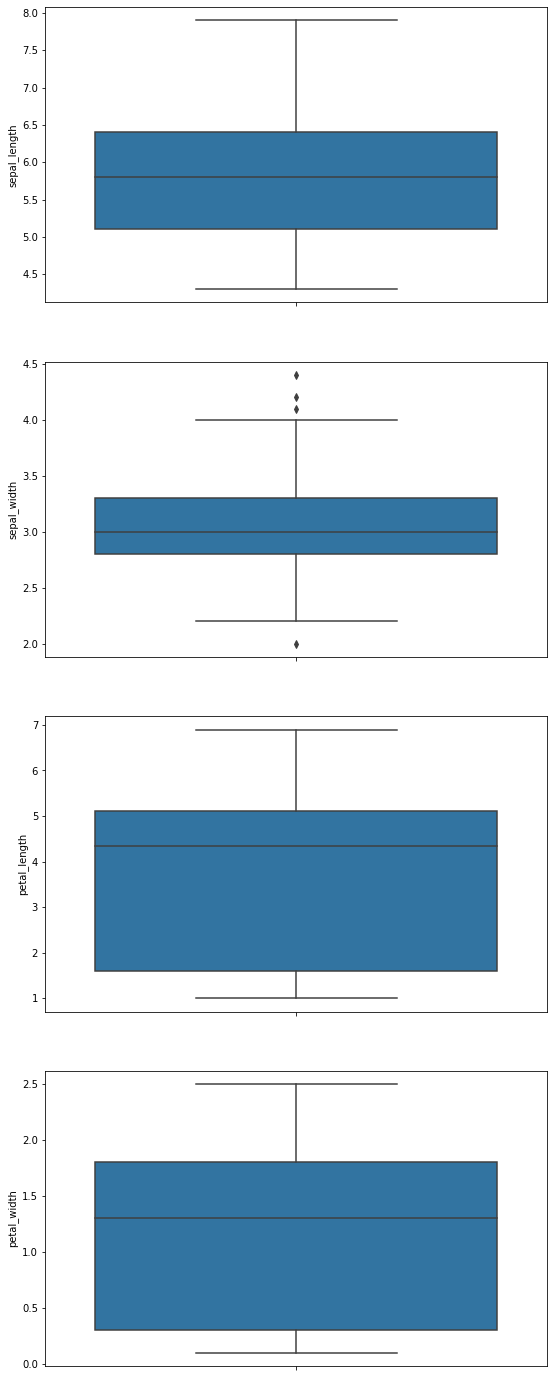

In [20]:
column_names=df.columns
fig,axes=plt.subplots(nrows=len(column_names), figsize=(9,25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df)

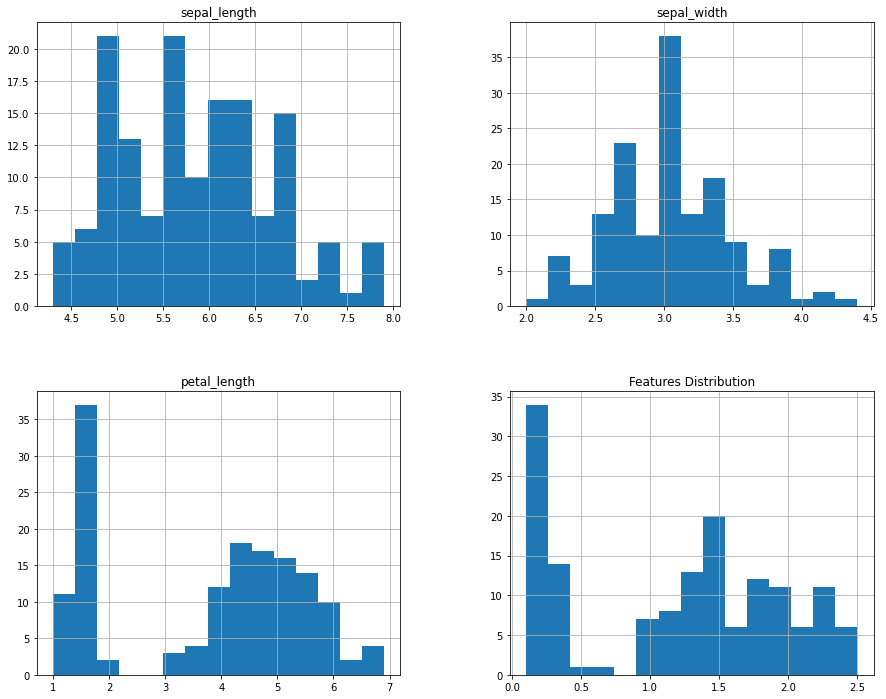

In [21]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# Data Preparation

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=[
  'sepal_length','sepal_width','petal_length','petal_width'])

print("Scaled Dataset Using StandardScaler")
df.head()

Scaled Dataset Using StandardScaler


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


<AxesSubplot:>

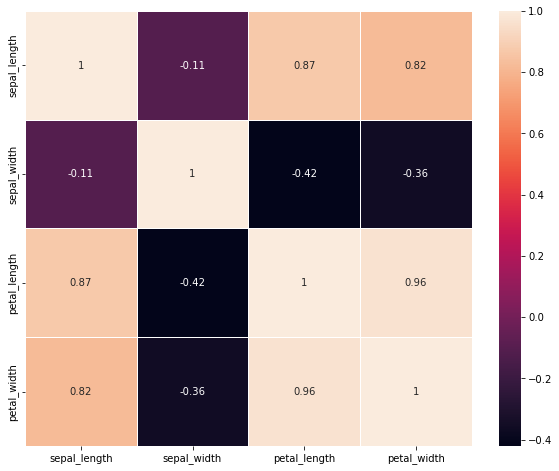

In [23]:
corr=df.corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

In [24]:
X = df.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
fig = plt.figure(figsize =(10,5))

<Figure size 720x360 with 0 Axes>

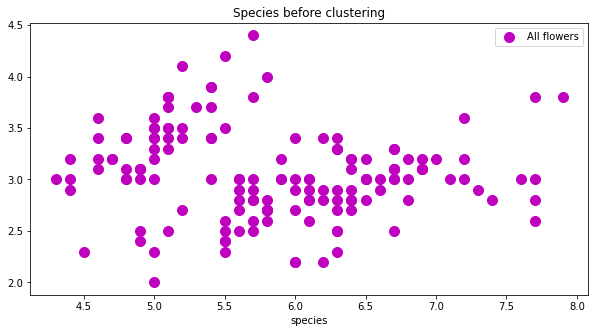

In [25]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='All flowers')
plt.title('Species before clustering')
plt.xlabel('species')
plt.ylabel('')
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


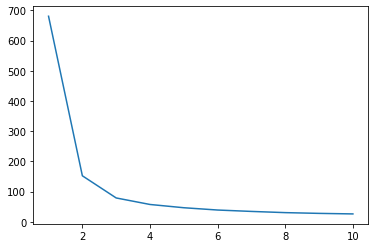

In [26]:
wcss_2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(df)
    wcss_2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_2)

In [27]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279
For n_clusters = 6 The average silhouette_score is : 0.37121805054590085
For n_clusters = 7 The average silhouette_score is : 0.3600597997328459
For n_clusters = 8 The average silhouette_score is : 0.3603749708042153
For n_clusters = 9 The average silhouette_score is : 0.3139310239112048


# Modeling

# Clustering with K means

In [28]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3, random_state=123).fit(df)
y_kmeans = kmeans.fit_predict(X)

In [29]:
y_kmeans

array([0, 5, 5, 5, 0, 6, 5, 0, 5, 5, 6, 0, 5, 5, 6, 6, 6, 0, 6, 6, 0, 0,
       5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 6, 6, 5, 5, 0, 5, 5, 0, 0, 5, 5, 0,
       6, 5, 6, 5, 6, 0, 4, 4, 4, 2, 4, 7, 4, 8, 4, 2, 8, 7, 2, 7, 2, 4,
       7, 2, 7, 2, 7, 2, 9, 7, 4, 4, 4, 4, 7, 2, 2, 2, 2, 9, 7, 7, 4, 7,
       2, 2, 2, 7, 2, 8, 2, 2, 2, 7, 8, 2, 1, 9, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 9, 1, 9, 9, 1, 1, 3, 3, 9, 1, 9, 3, 9, 1, 3, 9, 9, 1, 3, 3, 3,
       1, 9, 9, 3, 1, 1, 9, 1, 1, 1, 9, 1, 1, 1, 9, 1, 1, 9])

In [30]:
df_final=df.copy()

In [31]:
df_final['K_Means_clusters']=k_means.labels_

In [32]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [33]:
kmeans.cluster_centers_

array([[5.1       , 3.45      , 1.51111111, 0.28333333],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.615     , 2.64      , 4.005     , 1.225     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.63333333, 3.03333333, 4.63333333, 1.45833333],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [5.39166667, 3.925     , 1.525     , 0.275     ],
       [5.96153846, 2.87692308, 4.51538462, 1.44615385],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.03529412, 2.70588235, 5.04117647, 1.79411765]])

In [34]:
df_final[df_final['K_Means_clusters']==2].head()

,sepal_length,sepal_width,petal_length,petal_width,K_Means_clusters
species,,,,,
1,7.0,3.2,4.7,1.4,2
1,6.4,3.2,4.5,1.5,2
1,5.5,2.3,4.0,1.3,2
1,6.5,2.8,4.6,1.5,2
1,5.7,2.8,4.5,1.3,2


In [35]:
df_final.K_Means_clusters.value_counts()

2    62
1    50
0    38
Name: K_Means_clusters, dtype: int64

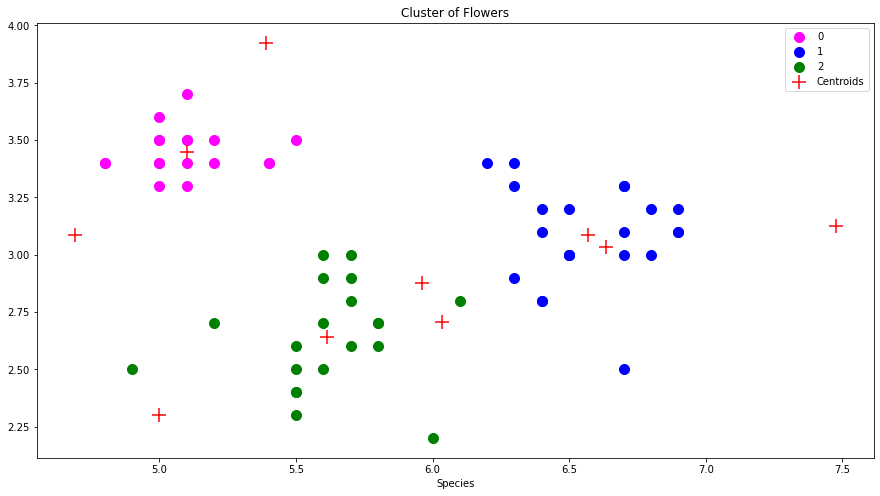

In [36]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='0')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='1')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='2')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Flowers')
plt.xlabel('Species')
plt.ylabel('')
plt.legend()
plt.show()

# Clustering with Hierachial

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)

In [39]:
df_final['Hierarchial_clusters']=hc

In [40]:
df_final[df_final['Hierarchial_clusters']==1].head(3)

,sepal_length,sepal_width,petal_length,petal_width,K_Means_clusters,Hierarchial_clusters
species,,,,,,
0,5.1,3.5,1.4,0.2,1,1
0,4.9,3.0,1.4,0.2,1,1
0,4.7,3.2,1.3,0.2,1,1


In [41]:
X=df.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
df_final.Hierarchial_clusters.value_counts()

0    64
1    50
2    36
Name: Hierarchial_clusters, dtype: int64

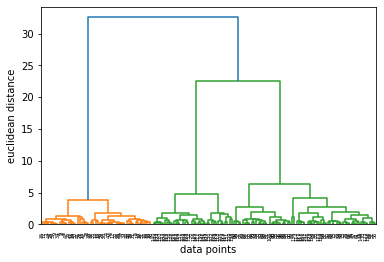

In [43]:
merg = linkage(df_final,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [44]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [45]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

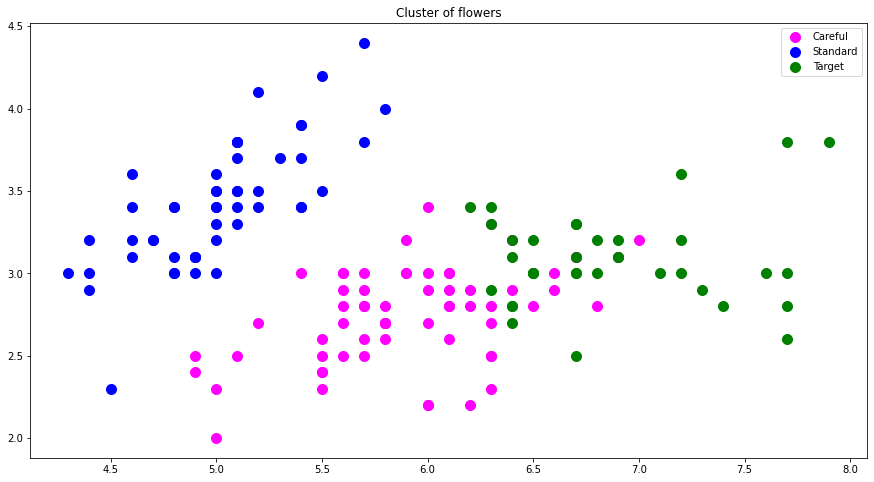

In [46]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.title('Cluster of flowers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.ioff()
plt.show()

# PCA

In [77]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [81]:
X = df.iloc[:, 0:5].values
y = df.iloc[:, 5].values


In [82]:
X.shape

(150, 5)

In [83]:
y.shape

(150,)

In [84]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [88]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [89]:
explained_variance

array([0.80165075, 0.19834925])

In [90]:
X_train

array([[ 1.81228681,  0.32892412],
       [ 0.21650159, -0.31805731],
       [-2.49629297,  0.60979929],
       [ 1.4056246 , -0.01738186],
       [ 2.18662606, -0.28310959],
       [-0.28003635, -1.03875576],
       [-2.33506332,  1.49549132],
       [ 0.91318644, -0.67438612],
       [ 0.14540345, -0.07127656],
       [ 0.36798554, -1.02106596],
       [ 1.99431567,  0.33870659],
       [-2.97700854, -0.23830922],
       [ 2.35022418,  0.58015711],
       [-2.13125341,  0.52886212],
       [-2.66997896,  1.1445484 ],
       [-0.44009145, -2.65574666],
       [ 1.67495882,  0.1800662 ],
       [ 2.4879968 ,  0.93107037],
       [ 1.45489942, -1.78419765],
       [ 2.00963169, -0.78844612],
       [-0.05301334, -1.31169924],
       [ 3.05843681,  0.7446691 ],
       [ 0.38325813,  0.76758253],
       [ 0.03335753, -1.58221118],
       [ 1.60781854, -0.56423971],
       [ 1.5343813 , -0.3761438 ],
       [ 0.55071398, -1.62380201],
       [ 2.05528367, -1.00650507],
       [ 0.61519763,

In [22]:
X_test

array([[ 1.37960415, -0.53729194],
       [ 0.40264025, -1.80174387],
       [-2.40757859,  2.27537196],
       [ 2.24817396,  0.30085181],
       [-2.28885782,  0.33060622],
       [ 1.82013827,  0.76151357],
       [-2.33111004,  0.55108009],
       [ 1.00220377,  0.46431842],
       [ 1.17898152, -0.14480961],
       [ 0.385069  , -0.4500747 ],
       [ 1.09116956, -0.88112041],
       [ 0.69001674,  0.55100274],
       [ 0.54114218, -0.45544581],
       [ 0.99319695, -0.27011559],
       [ 0.64003923, -0.23129483],
       [-2.27499477, -0.36482425],
       [ 0.58414465, -0.27011015],
       [ 0.15500333, -1.14644084],
       [-2.17146218, -0.61581809],
       [-2.20144074,  1.5922904 ],
       [ 0.88326538, -0.6396204 ],
       [ 0.27306206, -0.2270476 ],
       [-2.28664894,  0.24336267],
       [-2.45503936, -1.00889683],
       [ 1.08971093, -0.38806733],
       [-2.81636662,  0.59065374],
       [-2.14682479,  1.24538122],
       [ 0.49778552, -0.19135017],
       [-0.52928531,

In [91]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred)

In [94]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [95]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [96]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


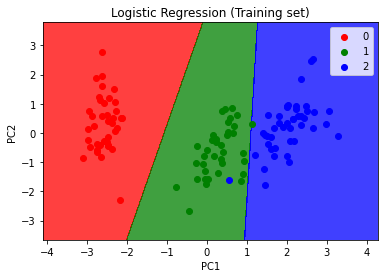

In [97]:
X_set, y_set = X_train, y_train
#minimum və maximum dəyərlərin köməyi ilə x1 və x2 (PCA1 və (PCA2) oxlarının aralığı təyin olunur)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


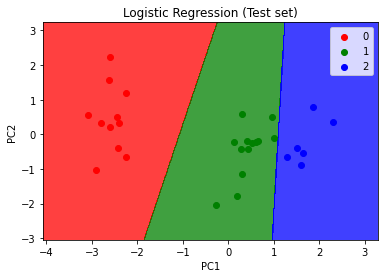

In [98]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()